# A shared-reflector isomorphic Yagi

This antenna is as simple as an isomorphic, linked Yagi gets. There's only one reflector -- it's a single piece of wire, not a linked reflector.

Here, we place focus on the 20m and 40m bands.

In [1]:
from isomorphic_yagis import differential_evolution, evaluate_antenna
from isomorphic_yagis.utils import plot_population, plot_results

In [17]:
# We'll run a differential evolution experiment with 500 antennas, 
# for 300 generations, with these parameter limits and override values
results = differential_evolution(
    n_population=500, 
    n_generations=1500,
)

100%|██████████| 500/500 [3:58:12<00:00, 28.58s/it]  


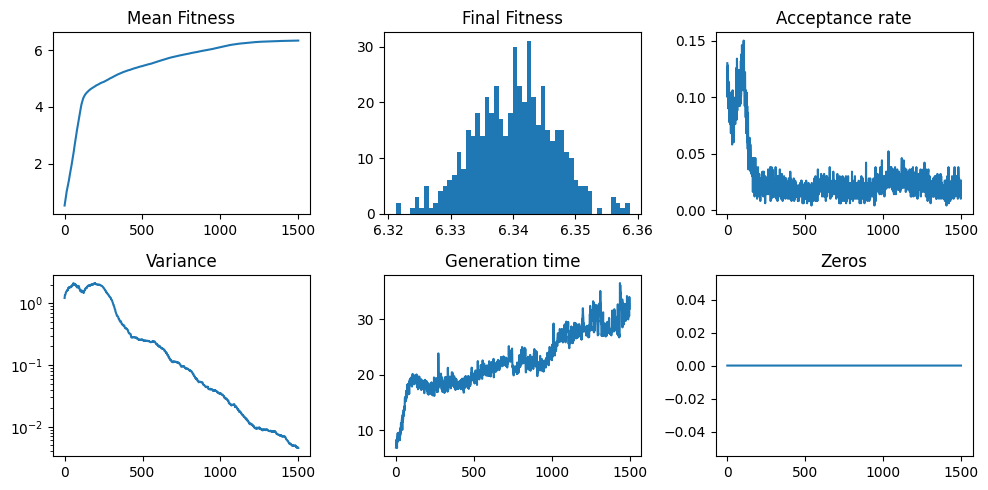

In [18]:
# How'd our experiment go ?
antennas, best_antenna = plot_results(results)

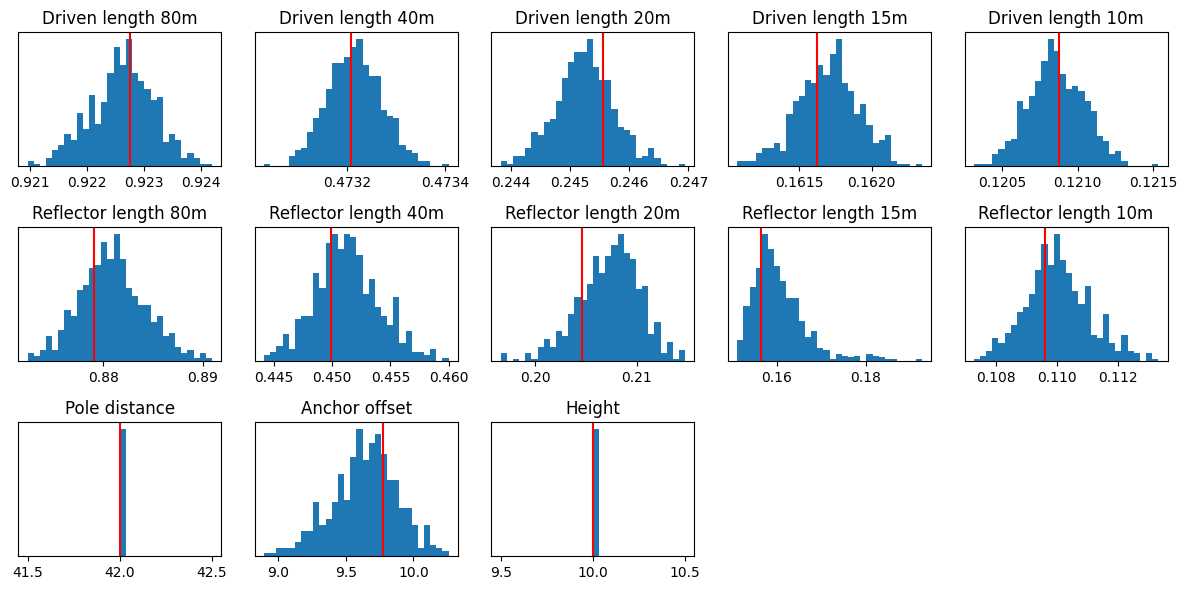

In [19]:
# What does the final antenna population look like ?
plot_population(antennas, results["fitness"])

In [20]:
# Which is our best antenna ?
best_antenna

{'driven_length_80': 0.9227497917069472,
 'reflector_length_80': 0.8790588652499263,
 'driven_length_40': 0.4732075088550854,
 'reflector_length_40': 0.44988345335242563,
 'driven_length_20': 0.24555748431611454,
 'reflector_length_20': 0.20460511505458687,
 'driven_length_15': 0.16162054044335805,
 'reflector_length_15': 0.15648291585843288,
 'driven_length_10': 0.12087956198042082,
 'reflector_length_10': 0.1096134975749031,
 'anchor_offset': 9.771925150724874,
 'pole_distance': 42.0,
 'height': 10.0}

In [21]:
# How does it perform on various bands ?
for band, stats in evaluate_antenna(
    best_antenna, 
    write=True
).items():
    print(f"{band}: {stats['gain']:.2f} dBi at {stats['swr']:.2f}:1 SWR")

80: 6.44 dBi at 1.01:1 SWR
40: 8.94 dBi at 1.01:1 SWR
20: 8.89 dBi at 1.58:1 SWR
15: 7.67 dBi at 1.32:1 SWR
10: 9.67 dBi at 1.49:1 SWR
